In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc,precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools
import xgboost as xgb

In [2]:
class_names = ['Retained','Churned'] 

In [3]:
sns.set_style("darkgrid", {'axes.grid' : False})

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='crest'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [5]:
churn = pd.read_csv('churn_clean.csv')

In [6]:
churn = pd.get_dummies(churn)

In [7]:
churn.head()

,Unnamed: 0,credit_score,age,tenure_years,balance,number_of_products,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [8]:
churn = churn.drop(columns = 'Unnamed: 0')

In [9]:
X = churn.drop(columns = ['churn'])
y = churn['churn']

In [10]:
print(y.shape)
print(X.shape)

(10000,)
(10000, 13)


In [11]:
X.head()

,credit_score,age,tenure_years,balance,number_of_products,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.25, 
                                                    random_state = 10)

In [13]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7500, 13) (2500, 13)
(7500,) (2500,)


### I'll start with baseline models using Random Forest, Gradient Boost and XGBoost then go from there. 

#### 1. Random Forest Baseline

In [14]:
RF = RandomForestClassifier()

In [15]:
RFModel = RF.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:')
print(cnf_matrix)


print('Classification Report:')
print(class_report)

Confusion Matrix:
[[1914   72]
 [ 287  227]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1986
           1       0.76      0.44      0.56       514

    accuracy                           0.86      2500
   macro avg       0.81      0.70      0.74      2500
weighted avg       0.85      0.86      0.84      2500



Normalized confusion matrix
[[0.96374622 0.03625378]
 [0.55836576 0.44163424]]


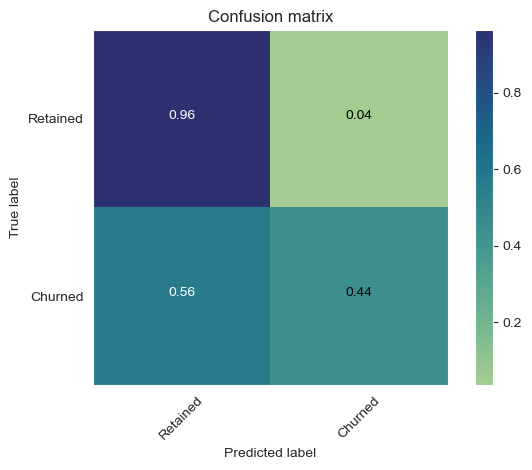

In [17]:
plot_confusion_matrix(cnf_matrix, class_names, normalize = True)

#### 2. Gradient Boost Baseline

In [18]:
GB = GradientBoostingClassifier()

In [19]:
GBModel = GB.fit(X_train, y_train)
y_pred_GB = GBModel.predict(X_test)

In [20]:
cnf_matrix_GB = confusion_matrix(y_test, y_pred_GB)
class_report_GB = classification_report(y_test, y_pred_GB)

print('Confusion Matrix:')
print(cnf_matrix_GB)


print('Classification Report:')
print(class_report_GB)

Confusion Matrix:
[[1907   79]
 [ 266  248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1986
           1       0.76      0.48      0.59       514

    accuracy                           0.86      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



Normalized confusion matrix
[[0.96022155 0.03977845]
 [0.51750973 0.48249027]]


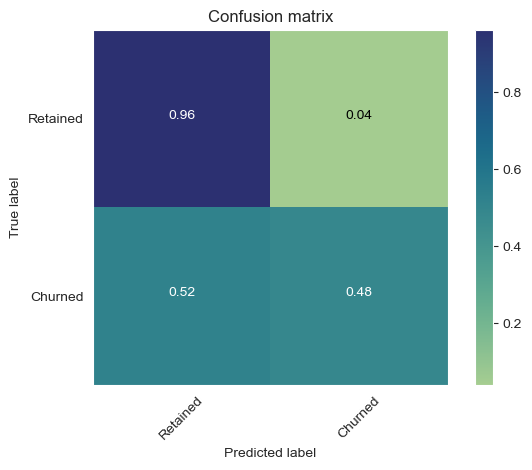

In [21]:
plot_confusion_matrix(cnf_matrix_GB, class_names, normalize = True)

#### 3. XGBoost Baseline

In [22]:
XGB = XGBClassifier()

In [23]:
XGBModel = XGB.fit(X_train, y_train)
y_pred_XGB = XGBModel.predict(X_test)

In [24]:
cnf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
class_report_XGB = classification_report(y_test, y_pred_XGB)

print('Confusion Matrix:')
print(cnf_matrix_XGB)


print('Classification Report:')
print(class_report_XGB)

Confusion Matrix:
[[1888   98]
 [ 257  257]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1986
           1       0.72      0.50      0.59       514

    accuracy                           0.86      2500
   macro avg       0.80      0.73      0.75      2500
weighted avg       0.85      0.86      0.85      2500



Normalized confusion matrix
[[0.95065458 0.04934542]
 [0.5        0.5       ]]


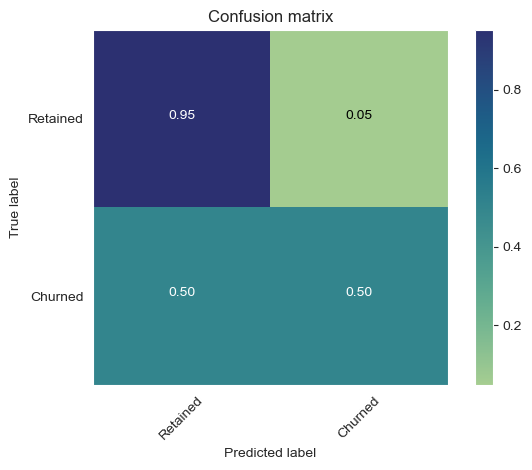

In [25]:
plot_confusion_matrix(cnf_matrix_XGB, class_names, normalize = True)

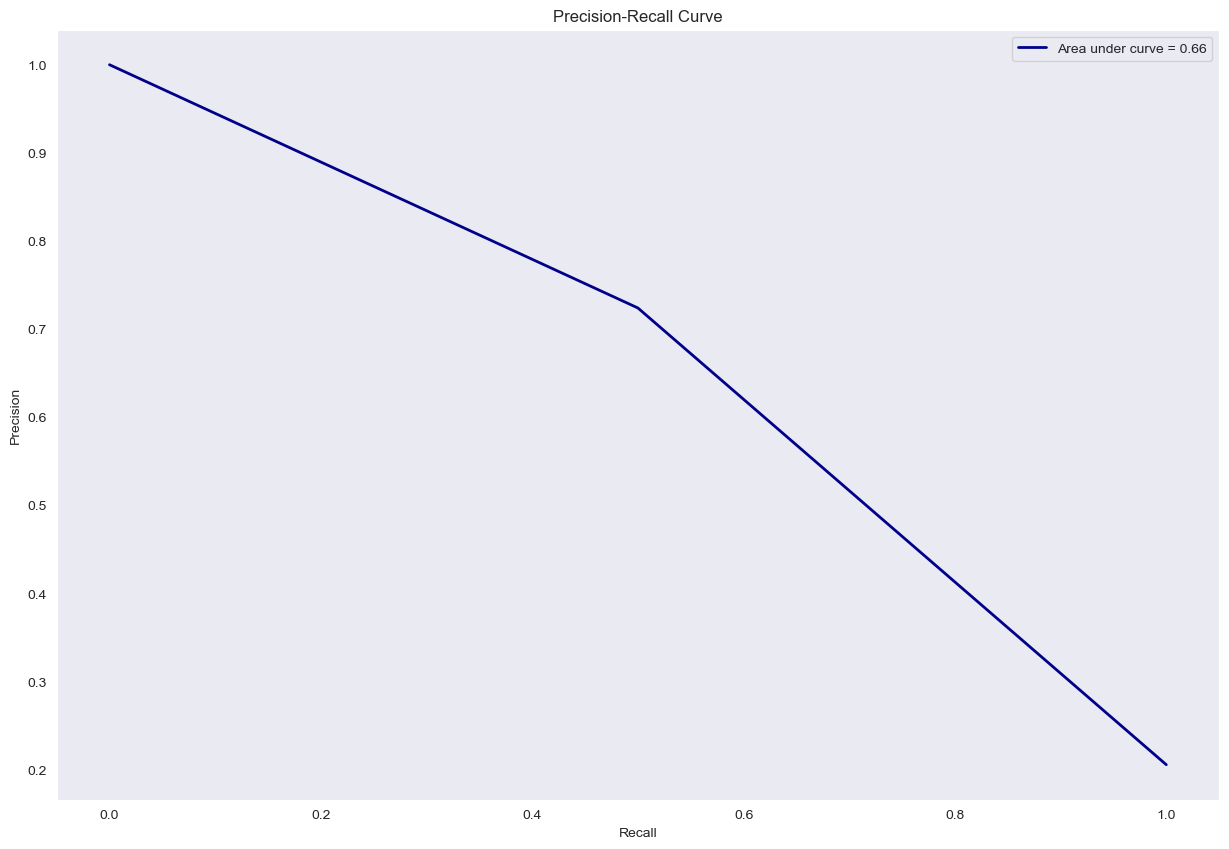

In [26]:
precision4, recall4, _ = precision_recall_curve(y_test.ravel(), y_pred_XGB.ravel())
area_under_curve4 = auc(recall4, precision4)

plt.figure(figsize=(15, 10))
plt.plot(recall4, precision4, color='darkblue', lw=2, label=f'Area under curve = {area_under_curve4:.2f}')
plt.xlabel('Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

I'm primarily going to be focusing on recall here. A false negative (marking a customer as retained, when in reality they've churned) does a lot more harm than a false positive (marking a customer as churned, when they haven't) in the case of preduct customer churn. 

No surprises here. Random Forest Performed the worst in terms of recall, with GB being slighly better and XGB being slightly better than that. 

Results are not great. My first thought is to assign a different class weight to our churn class and re try. We'll do that now with our three baseline models. 

#### 4. Random Forest Weighted Classes

In [27]:
RF_Weighted = RandomForestClassifier(class_weight = 'balanced')

In [28]:
Weighted_RF_Model = RF_Weighted.fit(X_train, y_train)
y_pred_RFW = Weighted_RF_Model.predict(X_test)

In [29]:
cnf_matrix_RFW = confusion_matrix(y_test, y_pred_RFW)
class_report_RFW = classification_report(y_test, y_pred_RFW)

print('Confusion Matrix:')
print(cnf_matrix_RFW)


print('Classification Report:')
print(class_report_RFW)

Confusion Matrix:
[[1918   68]
 [ 301  213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1986
           1       0.76      0.41      0.54       514

    accuracy                           0.85      2500
   macro avg       0.81      0.69      0.72      2500
weighted avg       0.84      0.85      0.83      2500



Normalized confusion matrix
[[0.96576032 0.03423968]
 [0.58560311 0.41439689]]


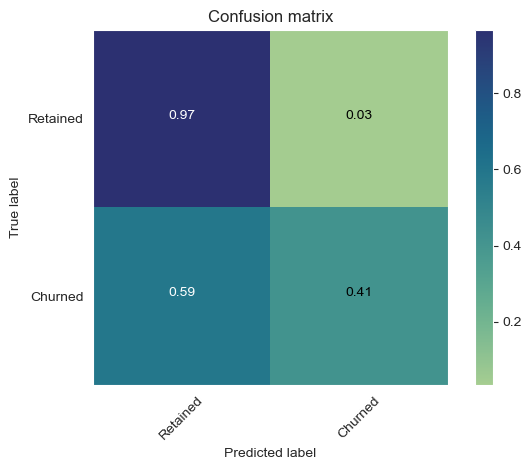

In [30]:
plot_confusion_matrix(cnf_matrix_RFW, class_names, normalize = True)

Not sure how but that made things worse. I'm going to pivot here and try to optimize XGBoost best I can. Since it provided the best out of the box results I feel it would be the most effective use of time to optimize from there. 

Checking feature importance of the best model so far, the XGBoost. 

In [31]:
XGBModel.get_booster().get_score(importance_type= 'gain')

{'credit_score': 1.8219645023345947,
 'age': 5.335175514221191,
 'tenure_years': 1.7017714977264404,
 'balance': 2.5437896251678467,
 'number_of_products': 14.180902481079102,
 'credit_card': 1.4613590240478516,
 'active_member': 7.900341987609863,
 'estimated_salary': 1.851953148841858,
 'country_France': 1.8756569623947144,
 'country_Germany': 5.447878360748291,
 'country_Spain': 1.7861685752868652,
 'gender_Female': 2.4635753631591797}

Text(0.5, 1.0, 'Feature Importance')

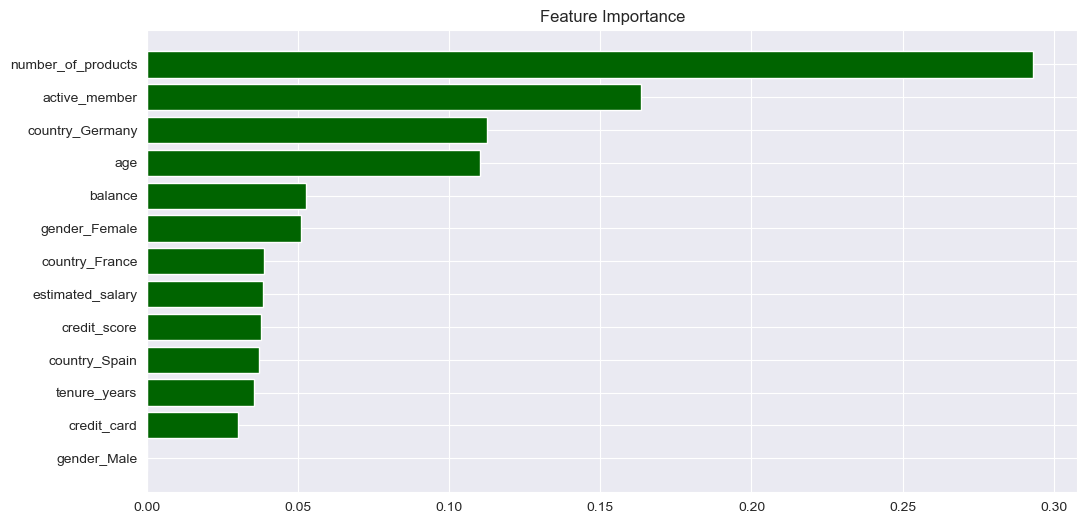

In [32]:
feature_importance = XGBModel.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color = 'darkgreen')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

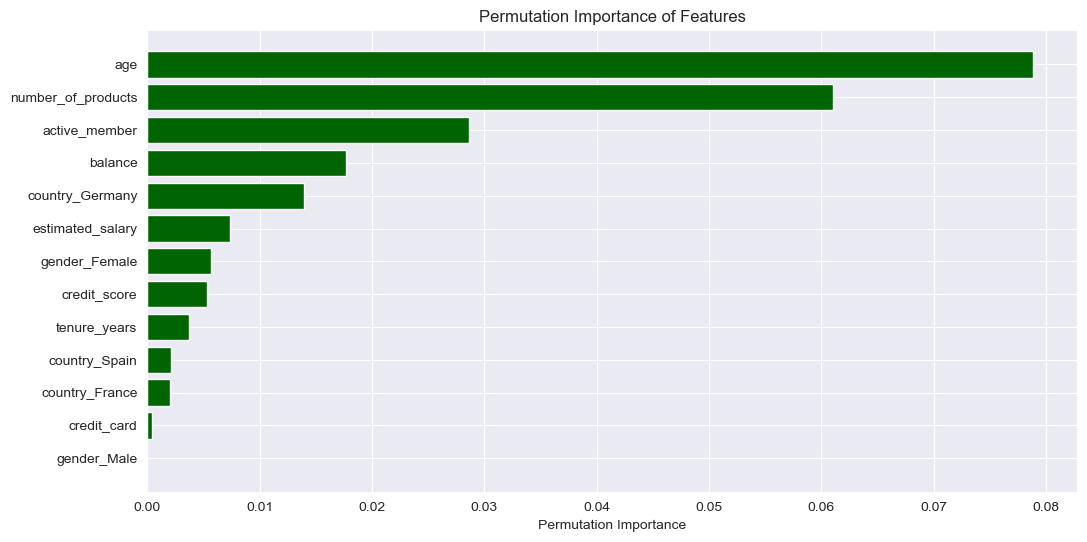

In [33]:
result = permutation_importance(XGBModel, X_test, y_test, n_repeats=10, random_state=10)

feature_names = X.columns

sorted_idx = result.importances_mean.argsort()

plt.figure(figsize = (12,6))
plt.barh(range(len(feature_names)), result.importances_mean[sorted_idx], align='center', color = 'darkgreen')
plt.yticks(range(len(feature_names)), np.array(feature_names)[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()

By default, XGB models compare feature importance based on 'weight.' Looking at our results here, the number of products appears most by a long shot in our model across all boosting rounds.

Looking at permutation importance, it seems like the model relies more on age than any other feature, despite it not appearing as much as others.

I took a break and read up on oversampling in the case of imbalanced classes, so I'm going to try over sampling and see if I can improve recall. 

In [34]:
over_sampling = SMOTE(sampling_strategy = 1)

X2 = churn.drop(columns=['churn'])
y2 = churn['churn']

X2, y2 = over_sampling.fit_resample(X2, y2)
Counter(y2)

Counter({1: 7963, 0: 7963})

Wonderful. Let's model. 

In [35]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,
                                                    test_size = 0.25, 
                                                    random_state = 10)

In [36]:
XGBModel2 = XGB.fit(X_train2, y_train2)
y_pred_oversampled = XGBModel2.predict(X_test2)

In [37]:
cnf_matrix_XGB2 = confusion_matrix(y_test2, y_pred_oversampled)
class_report_XGB2 = classification_report(y_test2, y_pred_oversampled)

print('Confusion Matrix:')
print(cnf_matrix_XGB2)


print('Classification Report:')
print(class_report_XGB2)

Confusion Matrix:
[[1851  164]
 [ 267 1700]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2015
           1       0.91      0.86      0.89      1967

    accuracy                           0.89      3982
   macro avg       0.89      0.89      0.89      3982
weighted avg       0.89      0.89      0.89      3982



Normalized confusion matrix
[[0.91861042 0.08138958]
 [0.13573971 0.86426029]]


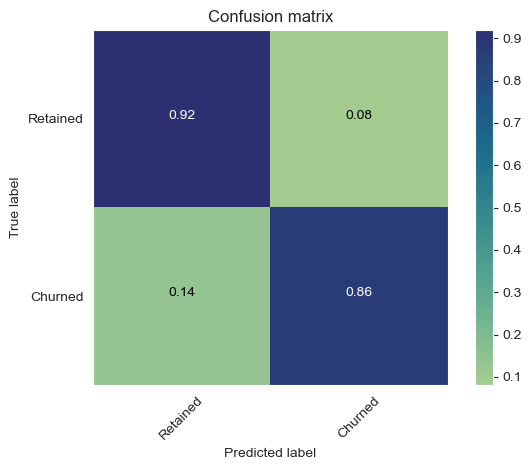

In [38]:
sns.set_style("darkgrid", {'axes.grid' : False})
plot_confusion_matrix(cnf_matrix_XGB2, class_names, normalize = True)

Now we're talkin! A 36% increase in recall for class one from over sampling. There's been a slight dip in recall for class 0, but I'm ok with that. Predicting a customer as churned when they haven't does less harm than predicting a customer as not churned when they have. 

In [47]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, y_pred_oversampled)
roc_auc = auc(false_positive_rate, true_positive_rate)

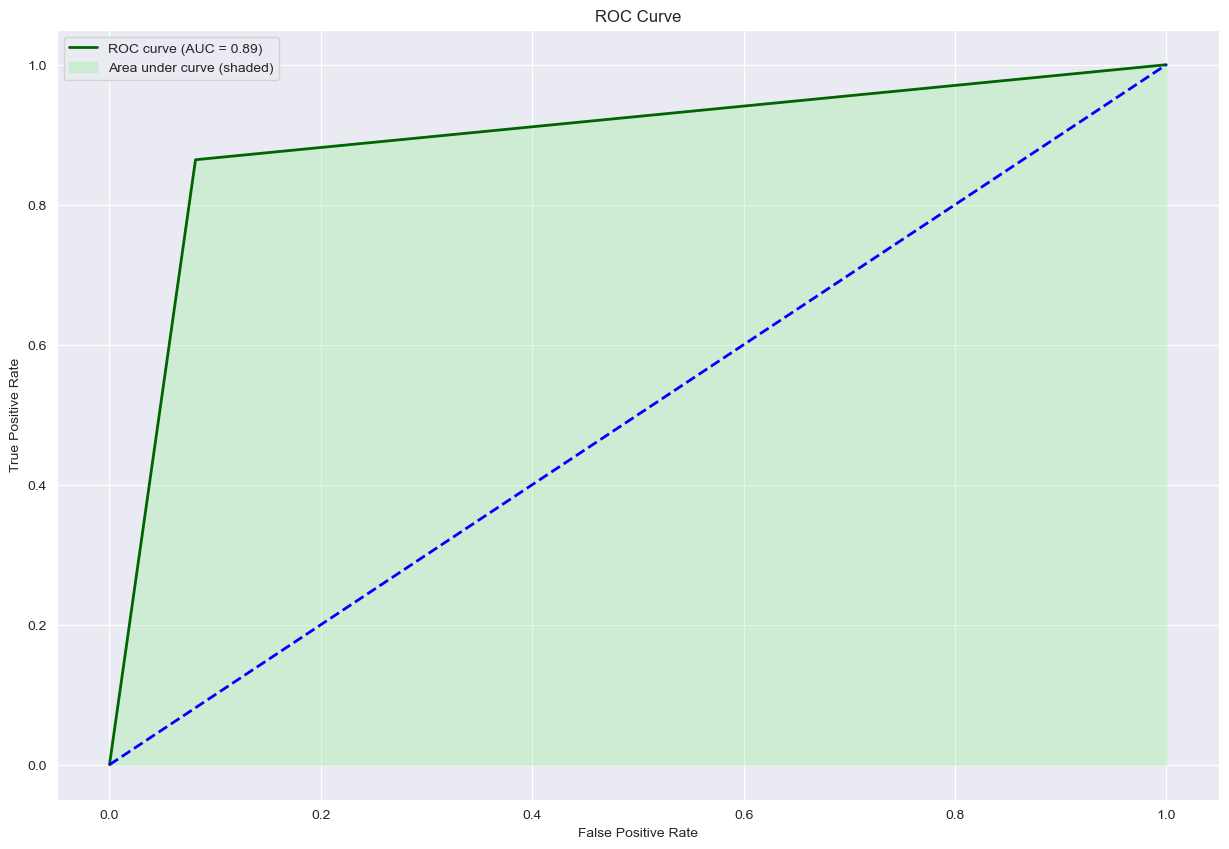

In [48]:
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
plt.plot(false_positive_rate, true_positive_rate, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.fill_between(false_positive_rate, true_positive_rate, color='lightgreen', alpha=0.3, label='Area under curve (shaded)')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.show()

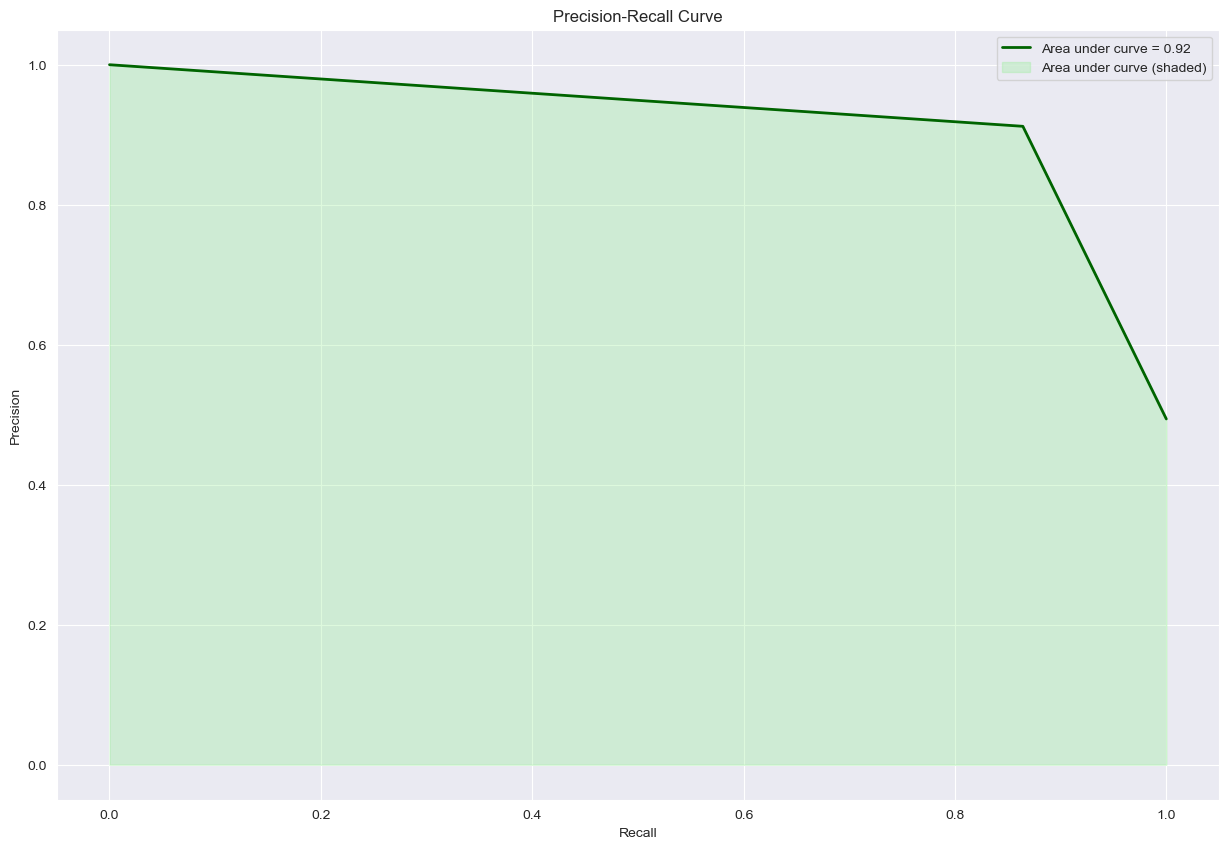

In [49]:
precision, recall, _ = precision_recall_curve(y_test2.ravel(), y_pred_oversampled.ravel())
area_under_curve = auc(recall, precision)

plt.figure(figsize=(15, 10))
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'Area under curve = {area_under_curve:.2f}')
plt.fill_between(recall, precision, color='lightgreen', alpha=0.3, label='Area under curve (shaded)')
plt.xlabel('Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Feature Importance - Oversampled Data')

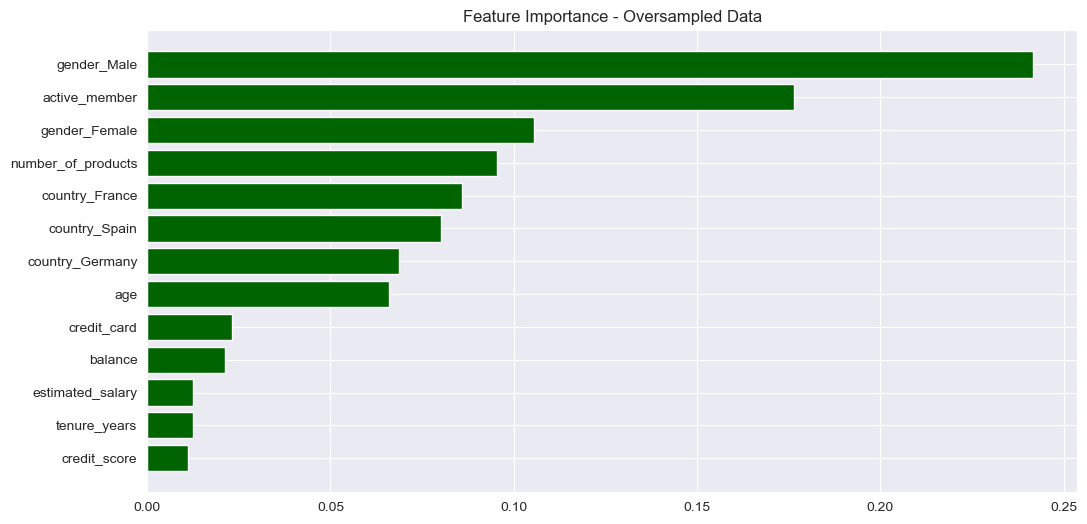

In [50]:
feature_importance2 = XGBModel2.feature_importances_
sorted_idx2 = np.argsort(feature_importance2)
fig = plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
plt.barh(range(len(sorted_idx2)), feature_importance2[sorted_idx2], align='center', color = 'darkgreen')
plt.yticks(range(len(sorted_idx2)), np.array(X_test2.columns)[sorted_idx2])
plt.title('Feature Importance - Oversampled Data')

Feature importance has changed significantly, and I am more confident that the above feature importance better explains churn compared to the original importance derived from the baseline model.

Oversampling to create an even class distribution seems to have better enabled the model to identify which features drive the most significant changes in our target variable.

In [51]:
XGB3 = XGBClassifier(subsample = 0.8,
 n_estimators = 200,
 max_depth = 12,
 learning_rate = 0.1,
 colsample_bytree =0.8)

In [52]:
XGBTuned_model = XGB3.fit(X_train2, y_train2)
y_pred_tuned = XGBTuned_model.predict(X_test2)

In [53]:
cnf_matrix_XGB3 = confusion_matrix(y_test2, y_pred_tuned)
class_report_XGB3 = classification_report(y_test2, y_pred_tuned)

print('Confusion Matrix:')
print(cnf_matrix_XGB3)


print('Classification Report:')
print(class_report_XGB3)

Confusion Matrix:
[[1860  155]
 [ 236 1731]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2015
           1       0.92      0.88      0.90      1967

    accuracy                           0.90      3982
   macro avg       0.90      0.90      0.90      3982
weighted avg       0.90      0.90      0.90      3982



Normalized confusion matrix
[[0.92307692 0.07692308]
 [0.11997966 0.88002034]]


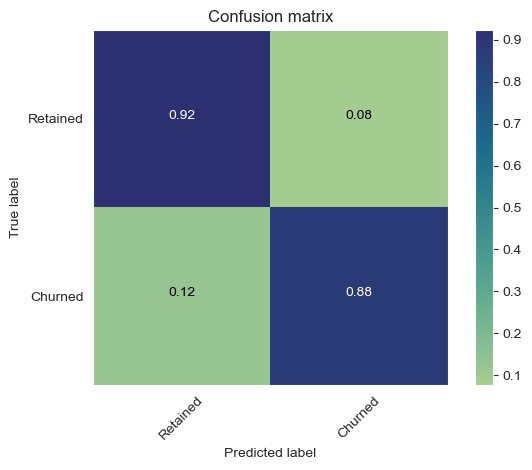

In [54]:
sns.set_style("darkgrid", {'axes.grid' : False})
plot_confusion_matrix(cnf_matrix_XGB3, class_names, normalize = True)

An improvement of 0.02 in both recall and precision for both Class 0 and 1 from my grid search. This is actually the first time I've seen any improvement from grid searching—nice!

In [55]:
fpr, tpr, thresholds = roc_curve(y_test2, y_pred_tuned)
roc_auc2 = auc(fpr, tpr)

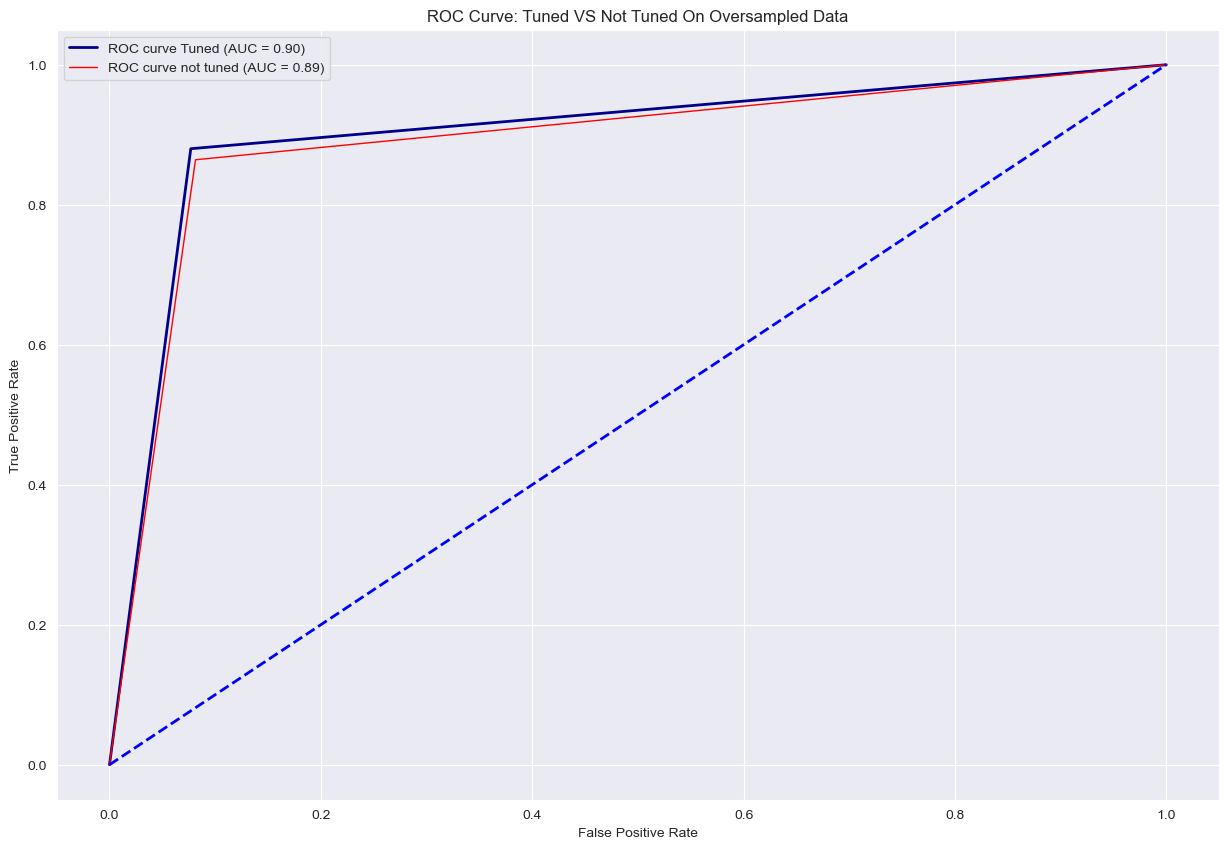

In [56]:
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve Tuned (AUC = {roc_auc2:.2f})')
plt.plot(false_positive_rate, true_positive_rate, color='red', lw=1, label=f'ROC curve not tuned (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Tuned VS Not Tuned On Oversampled Data')
plt.legend(loc='upper left')
plt.show()

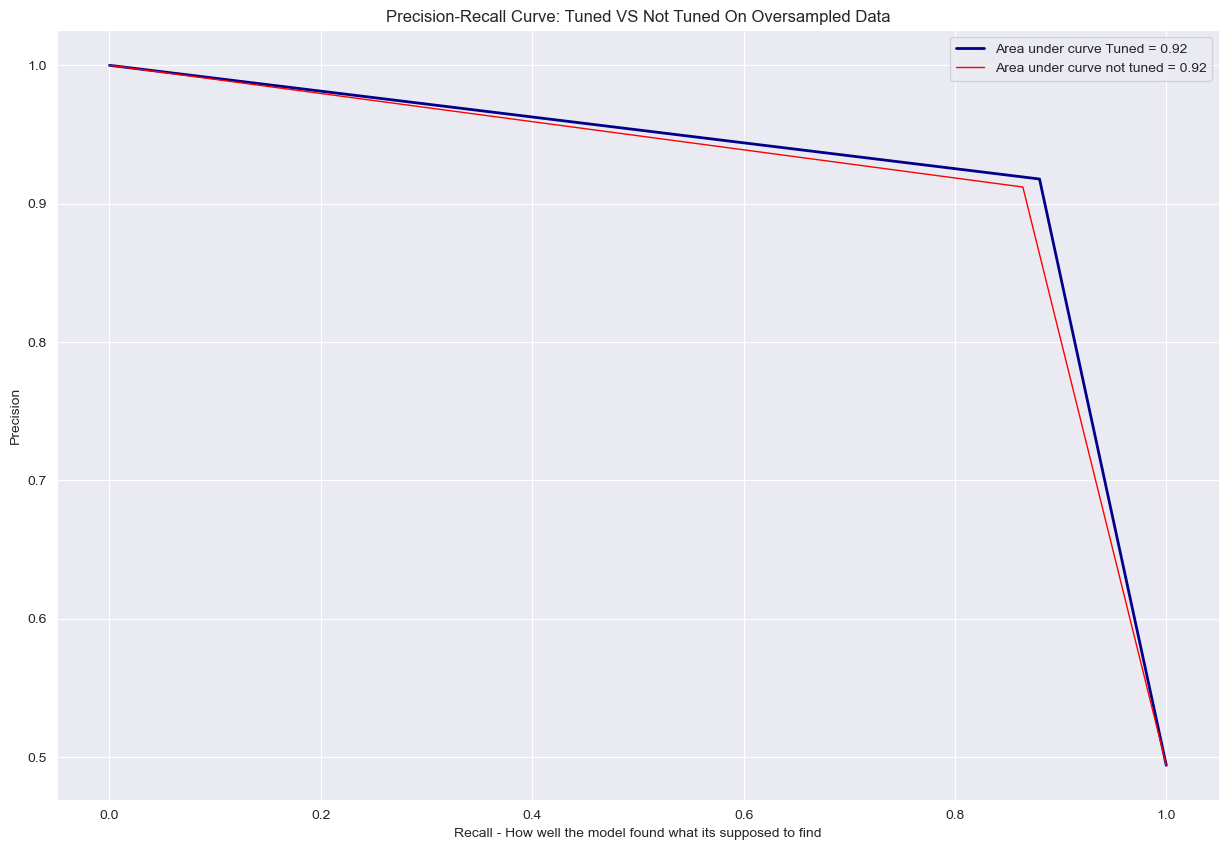

In [57]:
precision2, recall2, _ = precision_recall_curve(y_test2.ravel(), y_pred_tuned.ravel())
area_under_curve2 = auc(recall, precision)

plt.figure(figsize=(15, 10))
plt.plot(recall2, precision2, color='darkblue', lw=2, label=f'Area under curve Tuned = {area_under_curve:.2f}')
plt.plot(recall, precision, color='red', lw=1, label=f'Area under curve not tuned = {area_under_curve:.2f}')
plt.xlabel('Recall - How well the model found what its supposed to find')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Tuned VS Not Tuned On Oversampled Data')
plt.legend(loc='best')
plt.show()

##### For ROC:

Up and to the left = good. The more up and to the left, the better.

Why?

This is the point that maximizes our true positive rate while minimizing our false positive rate. Moving any further to the right (increasing our true positive rate) would also increase our false positive rate. Moving any further to the left (decreasing our false positive rate) would also decrease our true positive rate. This plot shows the point where our model found the sweet spot.

##### For precision vs recall:

Up and to the right = good. The more up and to the right, the better.

Why?

Any movement to the left, which increases our precision (the number of positive predictions that were indeed positive), would reduce our recall (how much of the positive instances of churn our model was able to capture), and vice versa.

As for our results, I'm quite happy with the improvement I saw from oversampling the data and running a grid search when compared with baseline models. 

#### Final XGBoost Model Stats:

##### Precision for Class 0 (Customer Retained): 88%. This means that for all positive class 0 predictions (predicting a customer as retained), 88% of them were correct.

##### Recall for Class 0 (Customer Retained): 92%. This means our model was able to capture 92% of positive instances. 92% of the time, if a customer was indeed retained and not churned, the model captured it.

##### Precision for Class 1 (Customer Churned): 92%. This means that for all positive class 1 predictions (predicting a customer as churned), 92% of them were correct.

##### Recall for Class 1 (Customer Churned): 87%. This means our model was able to capture 87% of positive instances. 87% of the time, if a customer was indeed churned and not retained, the model captured it.

*Future Brody Here after our call. I'm going to re do the above but will now make sure the test data isn't over sampled. I still wanted to keep the above work though.*

In [58]:
over_sampling = SMOTE(sampling_strategy = 1)

X_train3, y_train3 = over_sampling.fit_resample(X_train, y_train)
Counter(y_train3)

Counter({0: 5977, 1: 5977})

In [59]:
XGBModel3 = XGB.fit(X_train3, y_train3)
y_pred_oversampled2 = XGBModel3.predict(X_test)

In [60]:
cnf_matrix_XGB3 = confusion_matrix(y_test, y_pred_oversampled2)
class_report_XGB3 = classification_report(y_test, y_pred_oversampled2)

print('Confusion Matrix:')
print(cnf_matrix_XGB3)


print('Classification Report:')
print(class_report_XGB3)

Confusion Matrix:
[[1814  172]
 [ 213  301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1986
           1       0.64      0.59      0.61       514

    accuracy                           0.85      2500
   macro avg       0.77      0.75      0.76      2500
weighted avg       0.84      0.85      0.84      2500



Normalized confusion matrix
[[0.91339376 0.08660624]
 [0.41439689 0.58560311]]


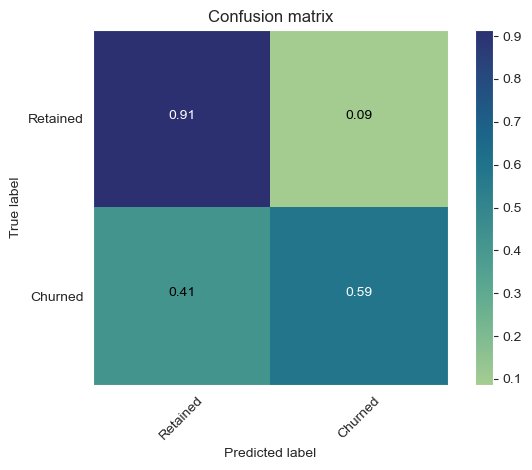

In [61]:
sns.set_style("darkgrid", {'axes.grid' : False})
plot_confusion_matrix(cnf_matrix_XGB3, class_names, normalize = True)

Here we have a 9% increase in class 1 recall from our baseline XGBModel using training data that was over sampled, and testing on data that was not oversamped. Precision however, has decreased from 72% to 64%.

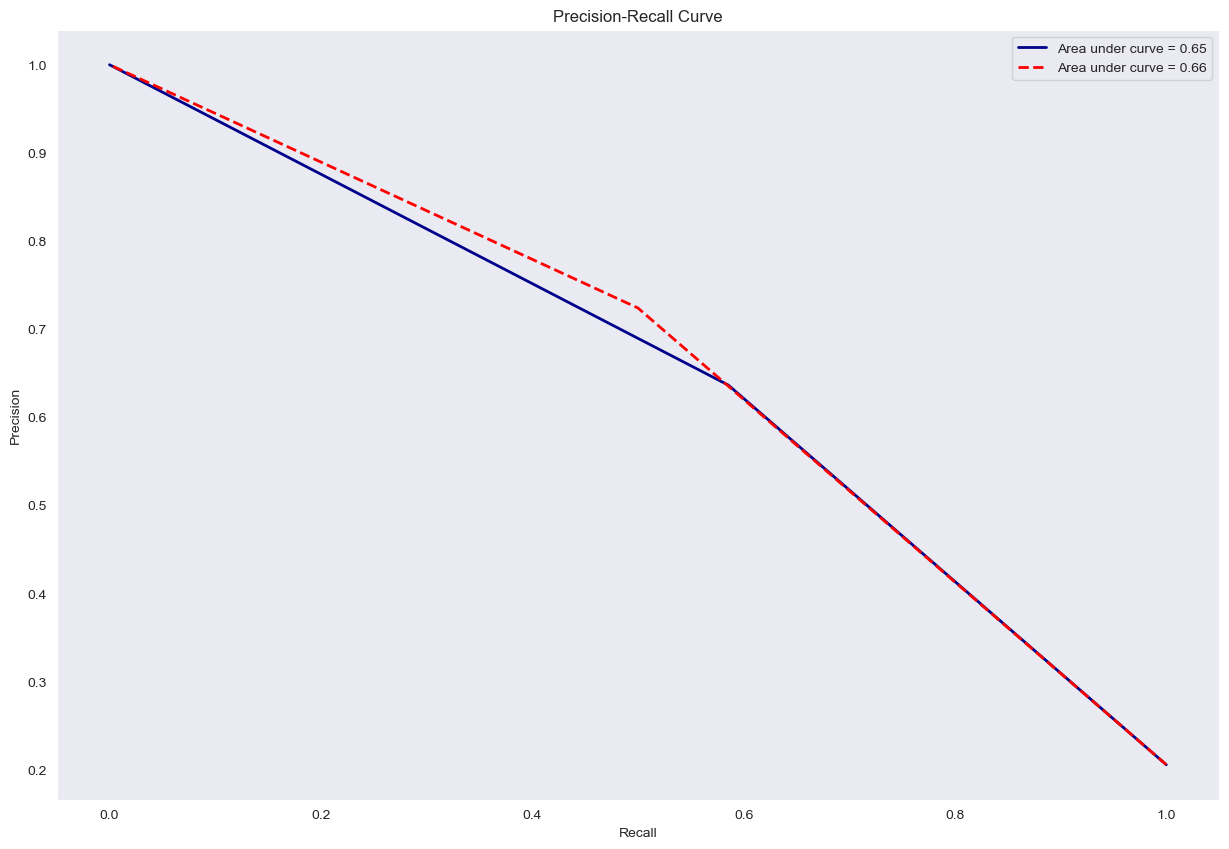

In [67]:
precision3, recall3, _ = precision_recall_curve(y_test.ravel(), y_pred_oversampled2.ravel())
area_under_curve3 = auc(recall3, precision3)

plt.figure(figsize=(15, 10))
plt.plot(recall3, precision3, color='darkblue', lw=2, label=f'Area under curve = {area_under_curve3:.2f}')
plt.plot(recall4, precision4, color='red', lw=2,linestyle = '--', label=f'Area under curve = {area_under_curve4:.2f}')
plt.xlabel('Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

So my recall improved but precision got worse. If my main concern is recall, is this still a victory or is it back to the drawing board? 